# Pandas Fundamentals

This notebook covers core pandas concepts with small, focused examples.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)


## Series & Data Frames


In [5]:
s = pd.Series([10, 20, 30], index=["a", "b", "c"])  # 1D labeled array
s


a    10
b    20
c    30
dtype: int64

In [8]:
df = pd.DataFrame({
    "name": ["Ana", "Ben", "Cara", "Dan"],
    "age": [23, 31, 27, 35],
    "city": ["Austin", "Boston", "Chicago", "Denver"],
    "score": [88.5, 92.0, 79.5, 85.0]
})

df


,name,age,city,score
0,Ana,23,Austin,88.5
1,Ben,31,Boston,92.0
2,Cara,27,Chicago,79.5
3,Dan,35,Denver,85.0


## Import & Export Data


In [13]:
from pathlib import Path

# Create a small CSV to load
csv_path = Path("sample_people.csv")
df.to_csv(csv_path, index=False)

# Read it back
loaded = pd.read_csv(csv_path)
loaded


,name,age,city,score
0,Ana,23,Austin,88.5
1,Ben,31,Boston,92.0
2,Cara,27,Chicago,79.5
3,Dan,35,Denver,85.0


## Data Exploration Functions


In [14]:
df.head(2)


,name,age,city,score
0,Ana,23,Austin,88.5
1,Ben,31,Boston,92.0


In [15]:
df.tail(2)


,name,age,city,score
2,Cara,27,Chicago,79.5
3,Dan,35,Denver,85.0


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    4 non-null      object 
 1   age     4 non-null      int64  
 2   city    4 non-null      object 
 3   score   4 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 260.0+ bytes


In [17]:
df.describe()


,age,score
count,4.000000,4.000000
mean,29.000000,86.250000
std,5.163978,5.330729
min,23.000000,79.500000
25%,26.000000,83.625000
50%,29.000000,86.750000
75%,32.000000,89.375000
max,35.000000,92.000000


In [18]:
df["city"].value_counts()


city
Austin     1
Boston     1
Chicago    1
Denver     1
Name: count, dtype: int64

## Statistical Functions & Plotting


In [19]:
df["age"].mean(), df["score"].median(), df["score"].std()


(np.float64(29.0), np.float64(86.75), np.float64(5.330728530573158))

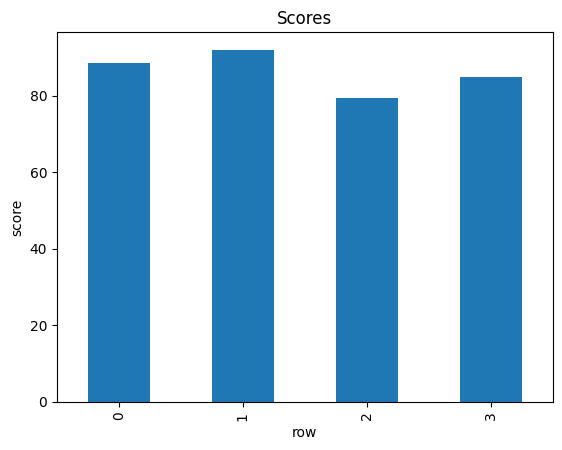

In [25]:
# Basic plots
ax = df["score"].plot(kind="bar", title="Scores")
ax.set_xlabel("row")
ax.set_ylabel("score")
plt.show()


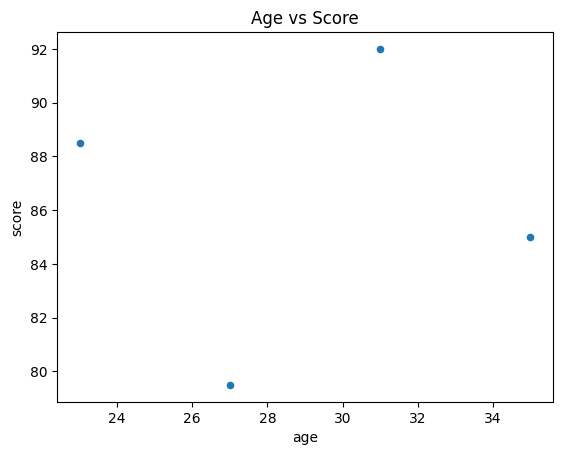

In [28]:
# Scatter plot
ax = df.plot(kind="scatter", x="age", y="score", title="Age vs Score")
plt.show()


## Accessing Data


In [36]:
df["name"]  # column by label


0     Ana
1     Ben
2    Cara
3     Dan
Name: name, dtype: object

In [38]:
df.loc[0, "name"]  # label-based


'Ana'

In [32]:
df.iloc[0, 1]  # position-based


np.int64(23)

In [33]:
df.loc[:, ["name", "score"]]


,name,score
0,Ana,88.5
1,Ben,92.0
2,Cara,79.5
3,Dan,85.0


## Manipulating Data (Applying Functions)


In [44]:
df["score_pct"] = df["score"] / 100

# Apply a function row-wise

def grade(score):
    if score >= 90:
        return "A"
    if score >= 80:
        return "B"
    return "C"

df["grade"] = df["score"].apply(grade)

df


,name,age,city,score,score_pct,grade
0,Ana,23,Austin,88.5,0.885,B
1,Ben,31,Boston,92.0,0.920,A
2,Cara,27,Chicago,79.5,0.795,C
3,Dan,35,Denver,85.0,0.850,B


## Data Cleaning


In [47]:
dirty = pd.DataFrame({
    "name": ["Ana", "Ben", None, "Dan"],
    "age": [23, None, 27, 35],
    "city": ["Austin", "Boston", "Chicago", None]
})

# Missing values
cleaned = dirty.copy()

cleaned.isna()


,name,age,city
0,False,False,False
1,False,True,False
2,True,False,False
3,False,False,True


In [48]:
# Fill missing values
cleaned["age"] = cleaned["age"].fillna(cleaned["age"].mean())
cleaned["city"] = cleaned["city"].fillna("Unknown")

# Drop rows with missing name
cleaned = cleaned.dropna(subset=["name"])

cleaned


,name,age,city
0,Ana,23.000000,Austin
1,Ben,28.333333,Boston
3,Dan,35.000000,Unknown


## Iterating Over Data Frames
Iterate only when needed; vectorized ops are usually faster.


In [49]:
for idx, row in df.iterrows():
    if idx < 2:
        print(idx, row["name"], row["score"])


0 Ana 88.5
1 Ben 92.0


## Filtering & Querying Data


In [52]:
df[df["score"] >= 85]


,name,age,city,score,score_pct,grade
0,Ana,23,Austin,88.5,0.885,B
1,Ben,31,Boston,92.0,0.920,A
3,Dan,35,Denver,85.0,0.850,B


In [55]:
df.query("age >= 30 and score >= 85")


,name,age,city,score,score_pct,grade
1,Ben,31,Boston,92.0,0.92,A
3,Dan,35,Denver,85.0,0.85,B


## Grouping Data


In [56]:
grouped = df.groupby("city")["score"].mean()
grouped


city
Austin     88.5
Boston     92.0
Chicago    79.5
Denver     85.0
Name: score, dtype: float64

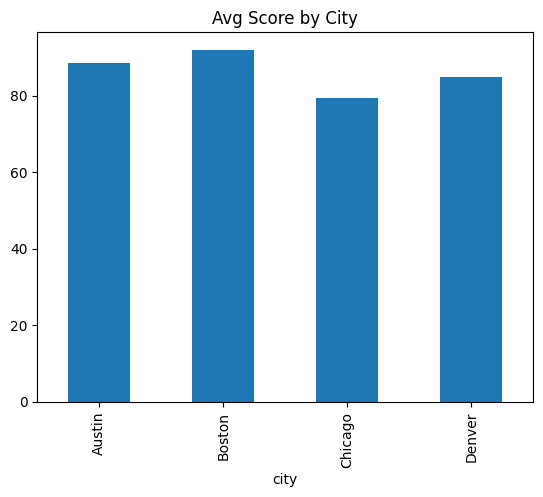

In [57]:
grouped.plot(kind="bar", title="Avg Score by City")
plt.show()


## Sorting Data


In [58]:
df.sort_values("score", ascending=False)


,name,age,city,score,score_pct,grade
1,Ben,31,Boston,92.0,0.920,A
0,Ana,23,Austin,88.5,0.885,B
3,Dan,35,Denver,85.0,0.850,B
2,Cara,27,Chicago,79.5,0.795,C


## Merging, Concatenating & Joining Data


In [59]:
left = pd.DataFrame({
    "id": [1, 2, 3],
    "name": ["Ana", "Ben", "Cara"]
})

right = pd.DataFrame({
    "id": [2, 3, 4],
    "team": ["A", "B", "C"]
})

pd.merge(left, right, on="id", how="inner")


,id,name,team
0,2,Ben,A
1,3,Cara,B


In [60]:
# Concatenate (stack rows)
upper = df.head(2)
lower = df.tail(2)

pd.concat([upper, lower], axis=0)


,name,age,city,score,score_pct,grade
0,Ana,23,Austin,88.5,0.885,B
1,Ben,31,Boston,92.0,0.920,A
2,Cara,27,Chicago,79.5,0.795,C
3,Dan,35,Denver,85.0,0.850,B


In [61]:
# Join on index
left_idx = left.set_index("id")
right_idx = right.set_index("id")

left_idx.join(right_idx, how="left")


,name,team
id,,
1,Ana,NaN
2,Ben,A
3,Cara,B
